In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('Medical Price Dataset.csv' )   # Loading train  dataset

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking for null values

In [ ]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

Countplot for sex

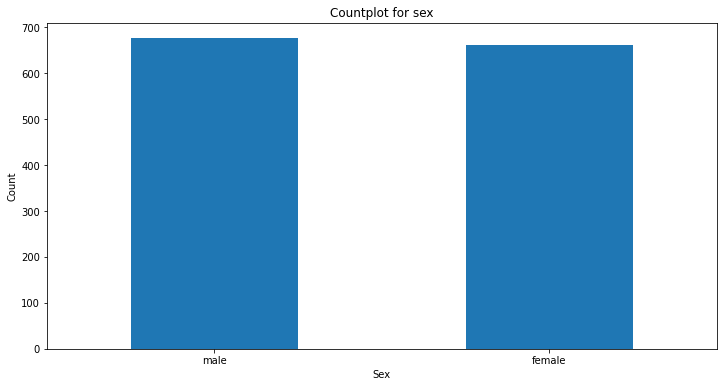

In [ ]:
plt.figure(figsize = (12,6))
fig = train['sex'].value_counts().plot(kind = "bar")

plt.title("Countplot for sex")
plt.xticks(rotation = 0)
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show(fig)

Countplot for bmi

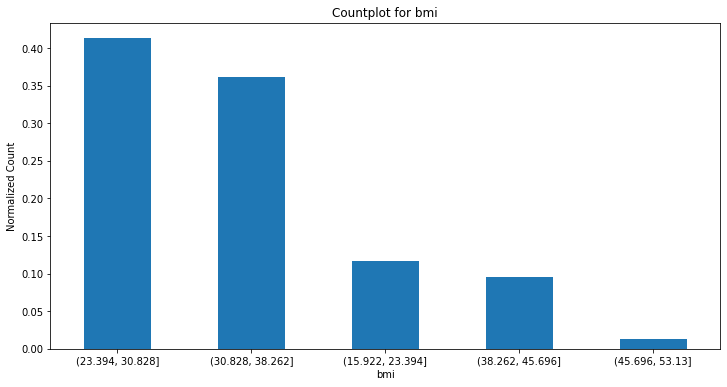

In [ ]:
plt.figure(figsize = (12,6))
fig = train['bmi'].value_counts(normalize = True , bins = 5).plot(kind = "bar")

plt.title("Countplot for bmi")
plt.xticks(rotation = 0)
plt.xlabel("bmi")
plt.ylabel("Normalized Count")
plt.show(fig)

Countplot for age

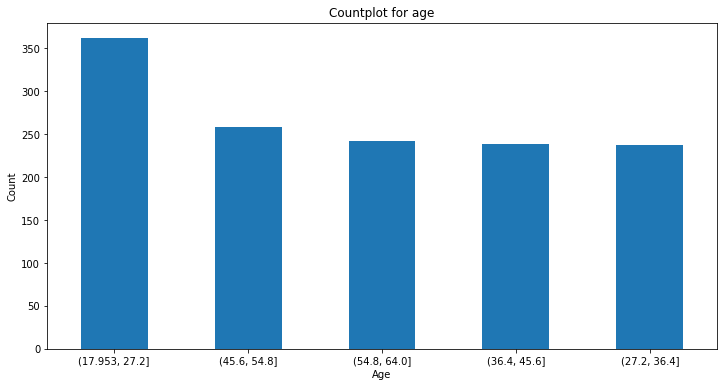

In [ ]:
plt.figure(figsize = (12,6))
fig = train['age'].value_counts(normalize = False , bins = 5).plot(kind = "bar")

plt.title("Countplot for age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.xticks(rotation = 0)
plt.show(fig)

Countplot for children

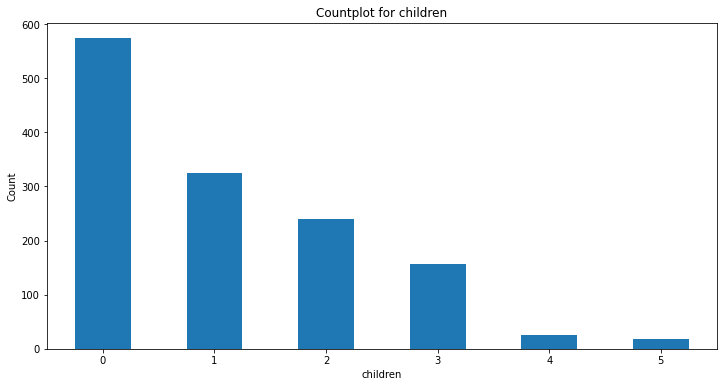

In [ ]:
plt.figure(figsize = (12,6))
fig = train['children'].value_counts(normalize = False).plot(kind = "bar")

plt.title("Countplot for children")
plt.xlabel("children")
plt.ylabel("Count")
plt.xticks(rotation = 0)

plt.show(fig)

Countplot for smoker

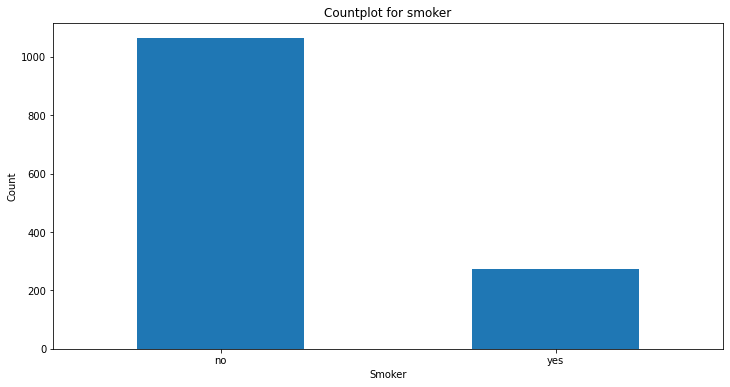

In [ ]:
plt.figure(figsize = (12,6))
fig = train['smoker'].value_counts(normalize = False).plot(kind = "bar")

plt.title("Countplot for smoker")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.xticks(rotation = 0)

plt.show(fig)

Plot for Sex vs Charges 

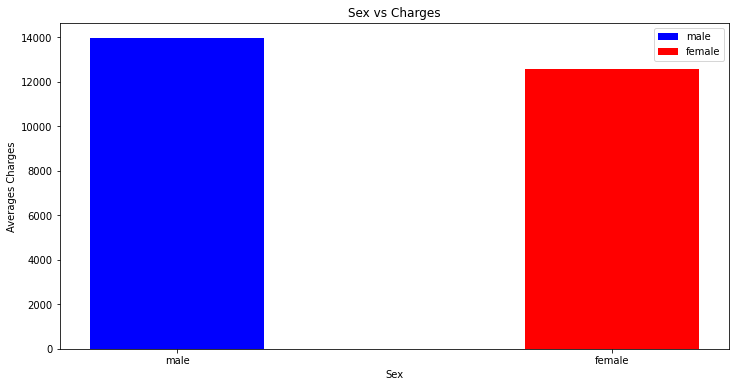

In [ ]:
df1 = train[train['sex'] == "male"]     # Splitting the dataframe
df2 = train[train["sex"] == "female"]   # Splitting the dataframe

plt.figure(figsize = (12,6))

plt.bar(df1['sex'].unique()[0] , np.mean(df1['charges']) , color = "blue" , label = "male" , width = 0.4 , align = "center")
plt.bar(df2['sex'].unique()[0] , np.mean(df2['charges']) , color = "red" , label = "female" , width = 0.4 , align = "center")

plt.title("Sex vs Charges")
plt.xlabel("Sex")
plt.ylabel("Averages Charges")
plt.legend()

plt.show()

### Inference : "Sex" feature doesn't affect "Charges"

Plot for Smoker vs Charges

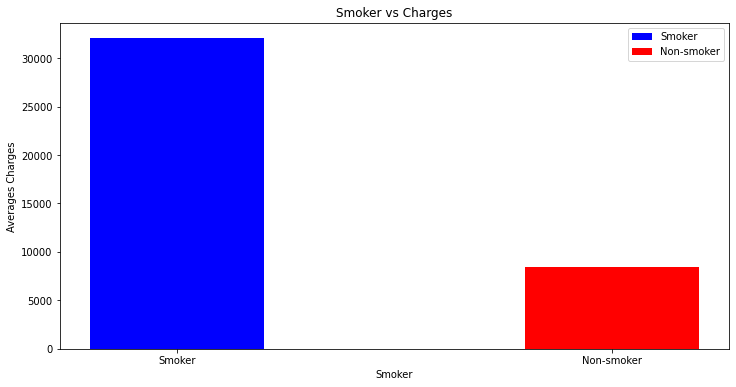

In [ ]:
df1 = train[train['smoker'] == "yes"]   # Splitting the dataframe
df2 = train[train["smoker"] == "no"]    # Splitting the dataframe

plt.figure(figsize = (12,6))

plt.bar( "Smoker" , np.mean(df1['charges']) , color = "blue" , label = "Smoker" , width = 0.4)
plt.bar( "Non-smoker" , np.mean(df2['charges']) , color = "red" , label = "Non-smoker" , width = 0.4)

plt.title("Smoker vs Charges")
plt.xlabel("Smoker")
plt.ylabel("Averages Charges")
plt.legend()

plt.show()

### Inference : "Smoker" feature affects "Charges"

Plot for Region vs Charges

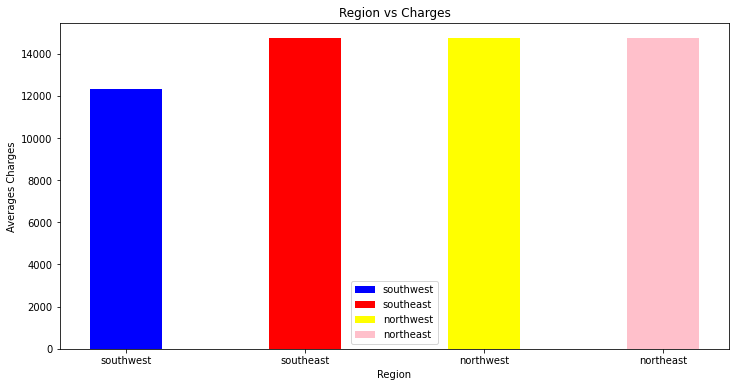

In [ ]:
df1 = train[train['region'] == "southwest"]   # Splitting the dataframe
df2 = train[train['region'] == "southeast"]   # Splitting the dataframe
df3 = train[train['region'] == "northwest"]   # Splitting the dataframe
df4 = train[train['region'] == "northeast"]   # Splitting the dataframe


plt.figure(figsize = (12,6))

plt.bar( "southwest" , np.mean(df1['charges']) , color = "blue" , label = "southwest" , width = 0.4)
plt.bar( "southeast" , np.mean(df2['charges']) , color = "red" , label = "southeast" , width = 0.4)
plt.bar( "northwest" , np.mean(df2['charges']) , color = "yellow" , label = "northwest" , width = 0.4)
plt.bar( "northeast" , np.mean(df2['charges']) , color = "pink" , label = "northeast" , width = 0.4)

plt.title("Region vs Charges")
plt.xlabel("Region")
plt.ylabel("Averages Charges")
plt.legend()

plt.show()

### Inference : "Region" feature doesn't affect "Charges"

Plot for Age vs Charges

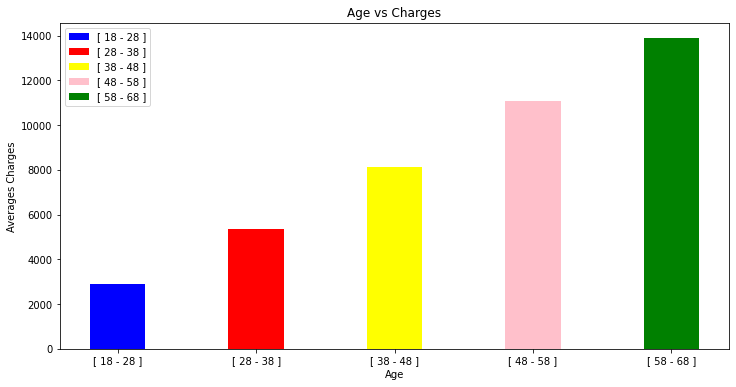

In [ ]:
df1 = train[(train['age'] >= 18) &  (train['age'] < 28)]    # Splitting the dataframe
df2 = train[(train['age'] >= 28) &  (train['age'] < 38)]    # Splitting the dataframe
df3 = train[(train['age'] >= 38) &  (train['age'] < 48)]    # Splitting the dataframe
df4 = train[(train['age'] >= 48) &  (train['age'] < 58)]    # Splitting the dataframe
df5 = train[(train['age'] >= 58) &  (train['age'] < 68)]    # Splitting the dataframe


plt.figure(figsize = (12,6))

plt.bar( "[ 18 - 28 ]" , np.median(df1['charges']) , color = "blue" , label = "[ 18 - 28 ]" , width = 0.4)
plt.bar( "[ 28 - 38 ]" , np.median(df2['charges']) , color = "red" , label = "[ 28 - 38 ]" , width = 0.4)
plt.bar( "[ 38 - 48 ]" , np.median(df3['charges']) , color = "yellow" , label = "[ 38 - 48 ]" , width = 0.4)
plt.bar( "[ 48 - 58 ]" , np.median(df4['charges']) , color = "pink" , label = "[ 48 - 58 ]" , width = 0.4)
plt.bar( "[ 58 - 68 ]" , np.median(df5['charges']) , color = "green" , label = "[ 58 - 68 ]" , width = 0.4)

plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Averages Charges")
plt.legend()

plt.show()

### Inference : "Age" feature affects "Charges"

## Feature Engineering

### Encoding Sex and Smoker columns

In [ ]:
train["sex"] = np.where(train['sex'] == "male" , 0 , 1) 

In [ ]:
train["smoker"] = np.where(train['smoker'] == "yes" , 0 , 1) 

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


### Scaling numerical colummns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train["bmi"]).reshape(-1,1))
train_scaled_bmi = pd.DataFrame(scaler.transform(np.array(train["bmi"]).reshape(-1,1)),columns = ["bmi"])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train["age"]).reshape(-1,1))
train_scaled_age = pd.DataFrame(scaler.transform(np.array(train["age"]).reshape(-1,1)),columns = ["age"])

In [ ]:
train.drop(["bmi"] , axis = 1 , inplace = True)
train.drop(["age"] , axis = 1 , inplace = True)

In [ ]:
train = pd.concat([train , train_scaled_bmi , train_scaled_age] , axis = 1)

In [ ]:
train.head(10)

,sex,children,smoker,region,charges,bmi,age
0,1,0,0,southwest,16884.92400,-0.453320,-1.438764
1,0,1,1,southeast,1725.55230,0.509621,-1.509965
2,0,3,1,southeast,4449.46200,0.383307,-0.797954
3,0,0,1,northwest,21984.47061,-1.305531,-0.441948
4,0,0,1,northwest,3866.85520,-0.292556,-0.513149
5,1,0,1,southeast,3756.62160,-0.807656,-0.584350
6,1,1,1,southeast,8240.58960,0.455486,0.483668
7,1,3,1,northwest,7281.50560,-0.479567,-0.157143
8,0,2,1,northeast,6406.41070,-0.136714,-0.157143
9,1,0,1,northwest,28923.13692,-0.791252,1.480485


In [ ]:
train.isnull().sum()

sex         0
children    0
smoker      0
region      0
charges     0
bmi         0
age         0
dtype: int64

### Dropping unwanted columns

In [ ]:
train.drop(['region'] ,axis = 1 , inplace = True)

In [ ]:
train.head()

,sex,children,smoker,charges,bmi,age
0,1,0,0,16884.92400,-0.453320,-1.438764
1,0,1,1,1725.55230,0.509621,-1.509965
2,0,3,1,4449.46200,0.383307,-0.797954
3,0,0,1,21984.47061,-1.305531,-0.441948
4,0,0,1,3866.85520,-0.292556,-0.513149


### Train-Validation Split

In [ ]:
import pandas as pd 
 
train_size = int(0.8 * len(train))


train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

### Defining X_train , X_val , y_train and y_val

In [ ]:
X_train = train_set.drop(['charges'],axis = 1)
X_val = val_set.drop(["charges"],axis = 1)
y_train = train_set["charges"]
y_val = val_set["charges"]

## Code for implementation of Linear Regression algorithm

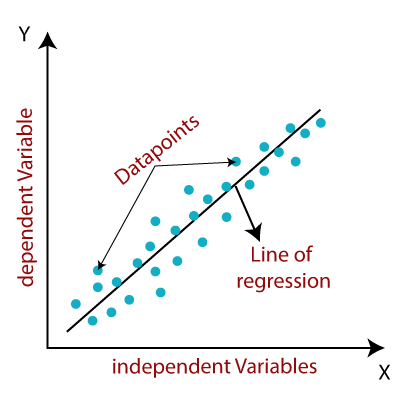

## Linear Regression

* Hypothesis Function : **h(m,c) : y = m*x + c** 
( *We are effectively trying to fit a straight line through the given data points* )
<br><br>
* Cost Function : **J(m,c) : $Σ_{i=1} ^{m}$ ($y_{i}$ - $y_{i}$')^2  * (1/(2*m)**

  (*$y_{i}$ : value of hypothesis function for $i^{th}$ input, $y_{i}$' : Actual value for $i^{th}$ input*)
<br><br>  
* The cost function, as the name suggests, is a way to evaluate our current regression line. The lower the output of the cost function, the better the regression line fits the data.
<br><br>
* Our goal is to minimize the cost function. We use a gradient descent function
to update the value of **m** and **c**.
<br><br>

* Gradient Descent for slope : **m : m - ($∂$ J(m) / $∂$ m) * $α$**
* Gradient Descent for intercept : **c : c - ($∂$ J(c) / $∂$ c) * $α$** 
 
                    
<br><br>
* The value of the learning rate generally ranges from $10^{-1}$ to $10^{-3}$

In [ ]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :          
        self.learning_rate = learning_rate          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :          
                 
        self.m, self.n = X.shape          
        
        # Variable initialization
        self.W = np.zeros( self.n )          
        self.b = 0          
        self.X = X          
        self.Y = Y        
          
        # gradient descent algorithm                  
        for i in range( self.iterations ) :              
            self.update_weights()
              
        return self
      
    # Function to update slope and intercept using gradient descent
      
    def update_weights( self ) :             
        Y_pred = self.predict( self.X )          
        # calculate gradients (partial derivatives)  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 

        # update slope and intercept
      
        self.W = self.W - self.learning_rate * dW      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothesis function  h( x ) 
      
    def predict( self, X ) :      
        return X.dot( self.W ) + self.b


### Function to calculate Mean Squared Error

In [ ]:
def mse(y_true , y_pred) :
  mse = np.square(np.subtract(y_true,y_pred)).mean()
  return mse

### Finding the best learning rate

In [ ]:
alpha_range = [0.1,0.3,0.9,0.01,0.03,0.09,0.001,0.003,0.009]

error_vals = []

for alpha in alpha_range:
  lr_alpha = LinearRegression(alpha , 100)
  lr_alpha.fit(X_train , y_train)
  y_preds_alpha = np.array(lr_alpha.predict(X_val))
  error_vals.append(round(mse(y_val , y_preds_alpha),2))

### Plot for Learning Rate vs Error

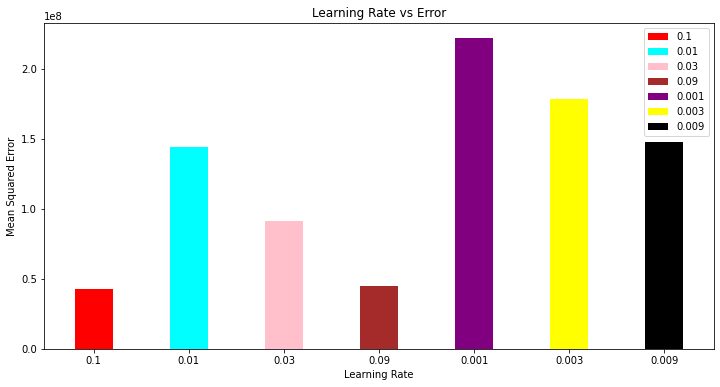

In [ ]:
plt.figure(figsize = (12, 6))

colors = ["red" , "green" , "blue" , "cyan" , "pink" , "brown" , "purple" , "yellow" , "black"]

for i in range(len(alpha_range)) : 
  if alpha_range[i] == 0.3 or alpha_range[i] == 0.9 :
    continue
  else:
    plt.bar(str(alpha_range[i]) , error_vals[i] , label = str(alpha_range[i]), color = colors[i] ,width = 0.4)


plt.title("Learning Rate vs Error")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.show()

### Inference : Learning Rate of 0.09 gives least error

In [ ]:
lr = LinearRegression(0.09 , 500)       # Object of class LinearRegression
lr.fit(X_train , y_train)               # Fitting the train data

In [ ]:
y_preds = np.array(lr.predict(X_val))   # Predicting for validation set

In [ ]:
print("Mean Squared Error : {}".format(round(mse(y_val , y_preds),2)))

Mean Squared Error : 37018951.75
